In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
path = "../../../data/"
file_name = path + "pctdata.csv"
df = pd.read_csv(file_name)

df0 = df[df['id_plane']==0]
df1 = df[df['id_plane']==1]
df2 = df[df['id_plane']==2]

df_center = df[df['id_x'].between(450,650)]
df_center = df_center[df_center['id_y'].between(200,400)]
df_center_xy = df_center.loc[:,['id_x','id_y']]

df_xy = df.loc[:,['id_x','id_y']]

### Using K-Means Clustering

* First, find the good number of cluster for KMeans

[7942175496.123623, 5070474444.420689, 3022970987.103941, 2518539648.028193, 2096994861.7483127, 1751740870.1097994, 1517548068.2138455]


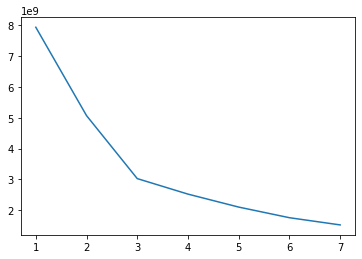

In [3]:
ks = range(1,8)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(df_xy)
    inertias.append(model.inertia_)
print(inertias)
plt.plot(range(1,8),inertias)
plt.show()

* I choose 3 for the number of cluster.

the center point of each cluster : 
 [[537.28344596 295.36114172]
 [817.31496859 289.64900704]
 [225.70912858 282.35681556]]


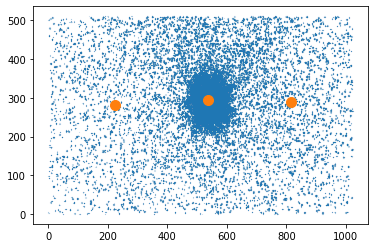

In [4]:
model = KMeans(n_clusters=3)
model.fit(df_xy)
print("the center point of each cluster : \n", model.cluster_centers_)
plt.scatter(df['id_x'],df['id_y'],s=0.005)
plt.scatter([537.22080299,817.2266603,225.4362751],[295.27433135,290.10601041,282.32698679],s=100)
plt.show()



* Using 3clustering, i get the above graph
* There are 3 cluster centers. Left center and right center may have appeared due to the noise.
* Second center indicated there are a lot of points.

### Using Mean-Shift clustering

* In KMeans clustering, I decide how many clusters will be in data. But in Mean-Shift clustering, I don't need to decide the number of clusters.
* https://www.mlguides.com/guides/clustering/mean-shift-clustering-tutorial-with-python-examples/
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html?highlight=meanshift#sklearn.cluster.MeanShift

(220138, 2)
the center point of each cluster : [[538.61539169 292.92638635]]


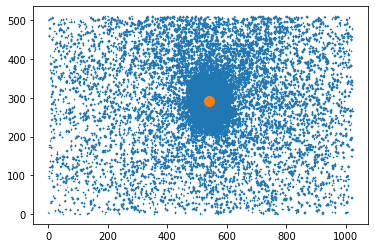

In [9]:
print(df_xy.shape)
# choose n_samples about 5% of the original data
bandwidth = estimate_bandwidth(df_xy, n_samples=10000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_xy)
cluster_centers = ms.cluster_centers_
print("the center point of each cluster :",cluster_centers)
plt.scatter(df_xy['id_x'],df_xy['id_y'],s=0.05)
plt.scatter(cluster_centers[0][0],cluster_centers[0][1], s=100)

* Mean-Shift clustering decide the number of cluster, which is 1.